In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import keras

import pandas as pd
from keras import layers,models
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dane=pd.read_csv("/content/drive/MyDrive/Dane_2/Tabela1_misje_generator.csv")
dane.head()

,l1_w,l1_c,l2_w,l2_c,l3_w,l3_c,l4_w,l4_c,l5_w,l5_c,...,l6_c,l7_w,l7_c,l8_w,l8_c,l9_w,l9_c,l10_w,l10_c,o_1
0,0,30,0,30,0,30,0,30,0,30,...,30,0,30,0,30,0,30,0,30,0
1,0,30,0,30,0,30,0,30,0,30,...,30,0,30,0,30,0,30,0,30,0
2,1,27,0,30,1,24,1,24,0,30,...,18,0,30,0,30,0,30,1,29,0
3,1,13,0,30,1,28,1,28,1,27,...,30,0,30,0,30,0,30,1,22,0
4,0,30,0,30,0,30,0,30,0,30,...,30,0,30,0,30,0,30,0,30,0


In [3]:
dane=dane.sample(frac=1)

In [4]:
X=dane.iloc[:,:20]
X.head()

,l1_w,l1_c,l2_w,l2_c,l3_w,l3_c,l4_w,l4_c,l5_w,l5_c,l6_w,l6_c,l7_w,l7_c,l8_w,l8_c,l9_w,l9_c,l10_w,l10_c
518,1,6,1,12,1,19,1,6,1,8,1,13,1,16,1,16,1,7,1,7
102,0,30,0,30,0,30,0,30,0,30,0,30,0,30,0,30,0,30,0,30
332,0,30,1,22,0,30,1,21,0,30,0,30,0,30,0,30,0,30,1,29
174,0,30,0,30,0,30,0,30,1,17,0,30,0,30,1,27,0,30,1,13
130,0,30,0,30,0,30,0,30,0,30,0,30,0,30,0,30,0,30,0,30


In [5]:
Y=dane.iloc[:,20:]
Y.head()

,o_1
518,1
102,0
332,0
174,0
130,0


In [6]:
X.to_numpy()
Y.to_numpy()

array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [7]:
print(len(X))
print(X)

634
     l1_w  l1_c  l2_w  l2_c  l3_w  l3_c  l4_w  l4_c  l5_w  l5_c  l6_w  l6_c  \
518     1     6     1    12     1    19     1     6     1     8     1    13   
102     0    30     0    30     0    30     0    30     0    30     0    30   
332     0    30     1    22     0    30     1    21     0    30     0    30   
174     0    30     0    30     0    30     0    30     1    17     0    30   
130     0    30     0    30     0    30     0    30     0    30     0    30   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
190     0    30     0    30     0    30     0    30     0    30     0    30   
577     0    30     1    12     1    15     1    18     1     7     1     3   
189     0    30     0    30     0    30     0    30     0    30     0    30   
375     1    20     0    30     0    30     0    30     0    30     1     3   
210     0    30     0    30     0    30     0    30     0    30     0    30   

     l7_w  l7_c  l8_w  l8_c  l9_w  l9_c  l10_w 

In [8]:

X_train=[]
Y_train=[]
X_validate=[]
Y_validate=[]
X_test=[]
Y_test=[]

In [9]:
X_all=X
Y_all=Y

In [10]:
Y_all.shape
X_all.shape

(634, 20)

In [11]:

Y_all=keras.utils.to_categorical(Y_all,2)


In [12]:
X_validate=X_all[(len(X_all)-60):len(X_all)]
Y_validate=Y_all[(len(Y_all)-60):len(Y_all)]
#X_test=X_all[(len(X_all)-160):(len(X_all)-100)]
#Y_test=Y_all[(len(Y_all)-160):(len(Y_all)-100)]
X_train=X_all[0:(len(X_all)-60)]
Y_train=Y_all[0:(len(Y_all)-60)]
print(len(Y_train))

574


In [13]:
X_train.shape



(574, 20)

In [14]:
model=keras.Sequential()
model.add(layers.Dense(8,activation='relu',input_shape=(20,)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 168       
                                                                 
 batch_normalization (Batch  (None, 8)                 32        
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 218 (872.00 Byte)
Trainable params: 202 (808.00 Byte)
Non-trainable params: 16 (64.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history=model.fit(X_train,Y_train,batch_size=16,epochs=100,validation_data=(X_validate,Y_validate),verbose=1)

Epoch 1/100
36/36 [==============================] - 3s 10ms/step - loss: 1.3296 - accuracy: 0.2038 - val_loss: 1.7609 - val_accuracy: 0.3000
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 0.9507 - accuracy: 0.4233 - val_loss: 0.8471 - val_accuracy: 0.6500
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 0.7308 - accuracy: 0.6603 - val_loss: 0.6990 - val_accuracy: 0.6833
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 0.6328 - accuracy: 0.7178 - val_loss: 0.6465 - val_accuracy: 0.6833
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 0.5601 - accuracy: 0.7474 - val_loss: 0.6197 - val_accuracy: 0.7000
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 0.4055 - accuracy: 0.8554 - val_loss: 0.5502 - val_accuracy: 0.7167
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: 0.3918 - accuracy: 0.8659 - val_loss: 0.4794 - val_accuracy: 0.7667
Epoch 8/100


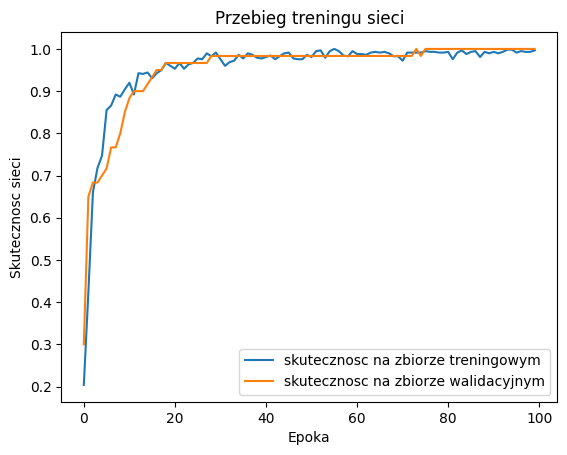

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Przebieg treningu sieci')
plt.ylabel('Skutecznosc sieci')
plt.xlabel('Epoka')
plt.legend(['skutecznosc na zbiorze treningowym', 'skutecznosc na zbiorze walidacyjnym'], loc='lower right')
plt.show()

In [18]:
#model.save('/content/drive/MyDrive/Colab Notebooks/model_misje.h5')